In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
train_data = pd.read_csv("../Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("../Data/CE802_P3_Test.csv",sep=',')
result_file="Results/CE802_P3_Test.csv"


C:\Conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:
cleanup = {"F12": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,4,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,2,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,2,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,4,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,4,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,0,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,1,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,2,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
cleanup = {"F4": {"UK":1, "USA":2, "Europe":3, "Rest":4}}
train_data = train_data.replace(cleanup)
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,4,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,4,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,1,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,1,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,2,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56


In [7]:
test = test.replace(cleanup)
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,2,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,4,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,4,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,1,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,4,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN


In [8]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test=test.drop('Target',axis=1)

In [9]:
x_scaler = StandardScaler()
X_scaled=x_scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled=y_scaler.fit_transform(y.values.reshape(-1,1))
params=y_scaler.get_params(deep=True)
X_test_scaled=x_scaler.fit_transform(X_test)

In [10]:
X_train, X_valid, y_train, y_valid =train_test_split(X, y,  random_state=1, test_size = 0.2)

In [11]:
X_train_scaled, X_valid_scaled, y_train_scaled, y_valid_scaled =train_test_split(X_scaled, y_scaled, random_state=1, test_size = 0.2)

In [12]:
lr = LinearRegression()
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50), activation="relu",max_iter=10000000)
lsvr = SVR(kernel='rbf', C=1e2, gamma=0.03)

In [13]:
lr.fit(X_train,y_train)
mlp.fit(X_train_scaled, y_train)
lsvr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.03,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
def compute_unscaled_neg_mean_squared_error(y_valid_scaled,ypred,**kwargs):
    unscaled_neg_mean_squared_error =  -sum((y_scaler.inverse_transform(y_valid_scaled.reshape(-1,1)).ravel() - y_scaler.inverse_transform(ypred) )**2) /len(ypred)
    return unscaled_neg_mean_squared_error

unscaled_neg_mean_squared_error = make_scorer(compute_unscaled_neg_mean_squared_error, greater_is_better=True)

In [15]:
cv_mse_lr = -round(cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean(),3)
cv_mse_mlp = -round(cross_val_score(mlp, X_train_scaled, y_train, cv = 5, scoring='neg_mean_squared_error').mean(),3)
cv_mse_lsvr = -round(cross_val_score(lsvr, X_train_scaled, y_train_scaled.ravel(), cv = 5, scoring=unscaled_neg_mean_squared_error).mean(),3)

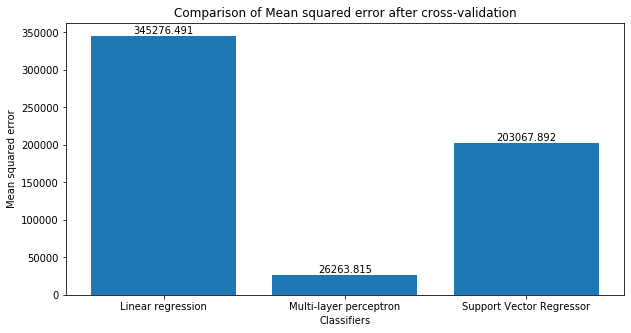

In [16]:
names = ['Linear regression','Multi-layer perceptron','Support Vector Regressor']
values = [cv_mse_lr, cv_mse_mlp ,cv_mse_lsvr]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Mean squared error") 
plt.title("Comparison of Mean squared error after cross-validation") 
plt.show() 

In [17]:
y_predict_lr = lr.predict(X_valid)
y_predict_mlp = mlp.predict(X_valid_scaled)
y_predict_lsvr = lsvr.predict(X_valid_scaled)

In [18]:
lr_mse=round(mean_squared_error(y_predict_lr, y_valid),3)
mlp_mse=round(mean_squared_error(y_predict_mlp, y_valid ),3)
lsvr_mse=round(-compute_unscaled_neg_mean_squared_error(y_valid_scaled,y_predict_lsvr),3)

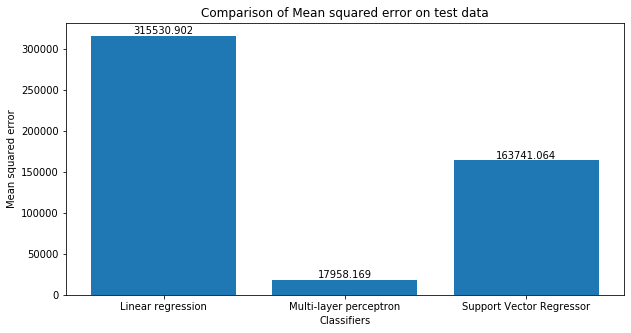

In [19]:
values = [lr_mse, mlp_mse ,lsvr_mse]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Mean squared error") 
plt.title("Comparison of Mean squared error on test data") 
plt.show() 

In [20]:
r2_lr=round(r2_score(y_valid,y_predict_lr),3)
r2_mlp=round(r2_score(y_valid,y_predict_mlp),3)
r2_lvsr=round(r2_score(y_valid_scaled,y_predict_lsvr),3)

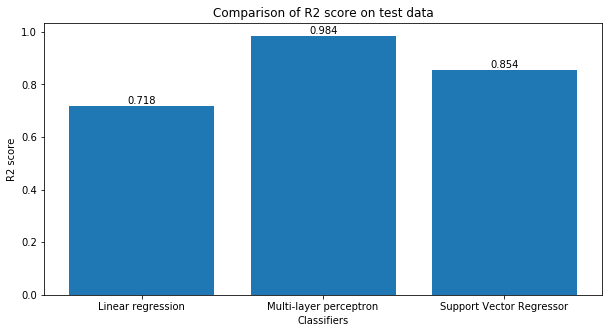

In [21]:
values = [r2_lr, r2_mlp ,r2_lvsr]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("R2 score") 
plt.title("Comparison of R2 score on test data") 
plt.show() 

In [22]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted(Linear regression)':y_predict_lr,'Predicted(Multi-layer perceptron)':y_predict_mlp,'Predicted(Support Vector Regressor)':y_scaler.inverse_transform(y_predict_lsvr)})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted(Linear regression),Predicted(Multi-layer perceptron),Predicted(Support Vector Regressor)
Record,,,,
0,0.00,441.166435,4.791305,0.324680
1,45.78,650.252726,83.502888,546.437081
2,0.00,-863.020720,-0.120901,-107.092372
3,112.05,709.387783,31.180163,384.016679
4,0.00,-359.257056,6.269251,54.550190
5,0.00,-125.229634,-0.763016,267.107650
6,40.59,213.772233,13.045973,-133.649483
7,1281.85,2136.755943,1391.083664,1437.327317
8,768.95,1134.872643,862.142790,1268.637219


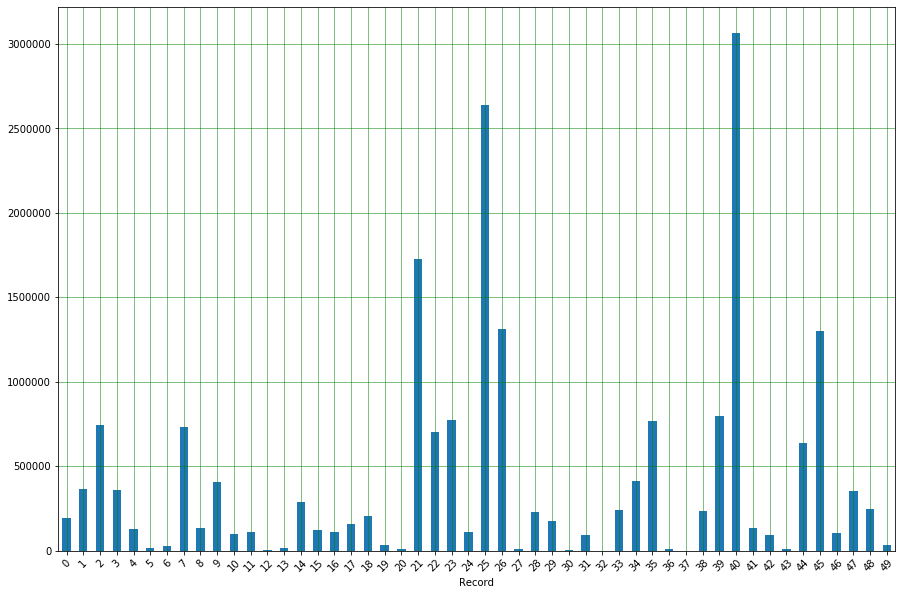

In [23]:
error = (df1['Actual'] - df1['Predicted(Linear regression)'])**2

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

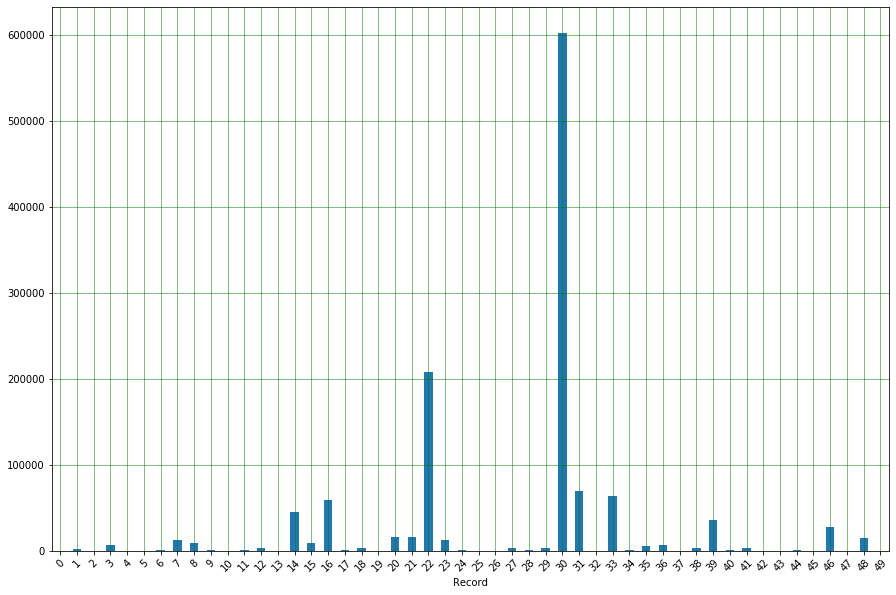

In [24]:
error = (df1['Actual'] - df1['Predicted(Multi-layer perceptron)'])**2


# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

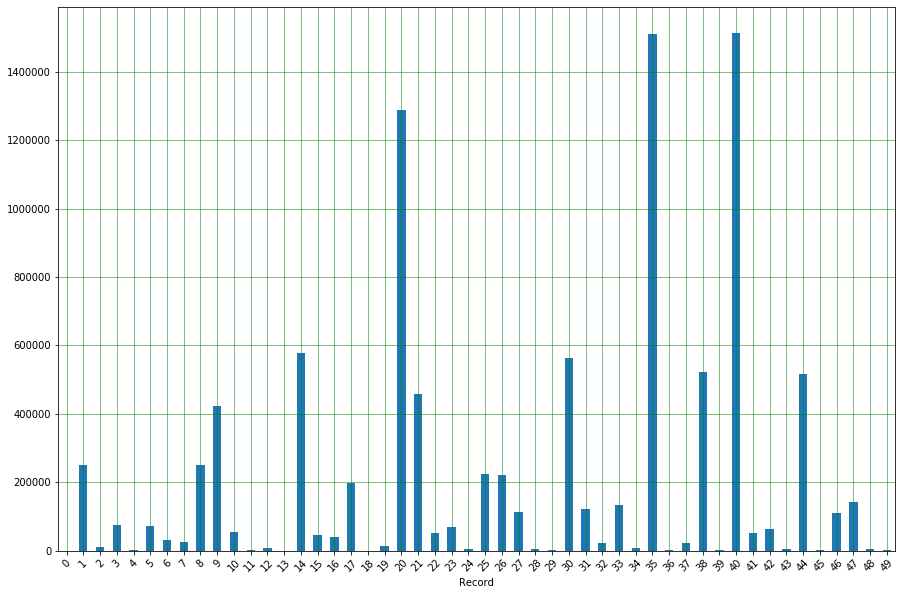

In [25]:
error = (df1['Actual'] - df1['Predicted(Support Vector Regressor)'])**2

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

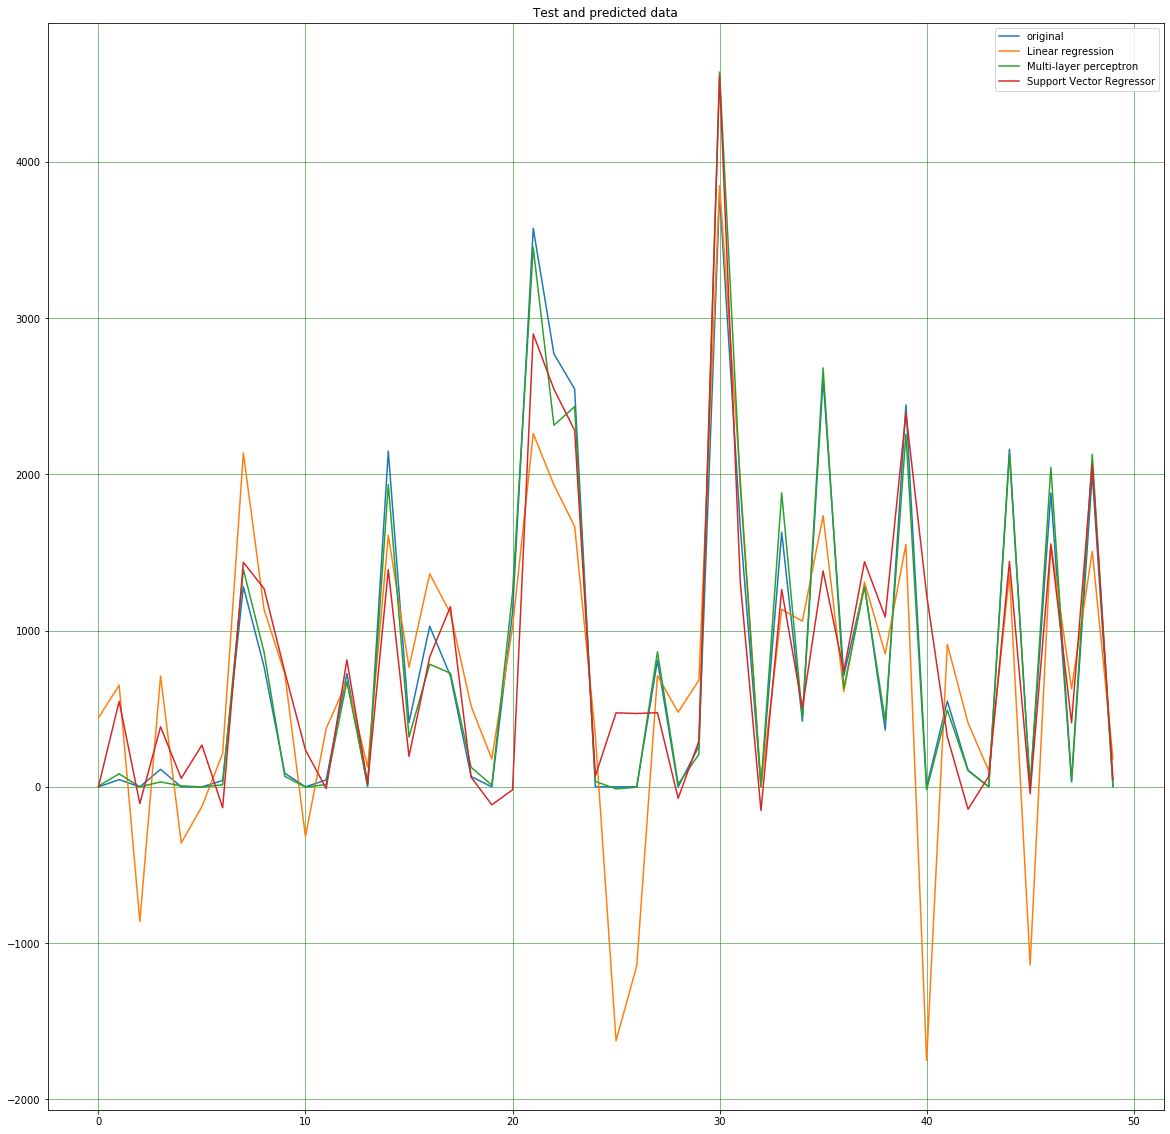

In [26]:
x_ax = range(len(df1['Actual']))
plt.figure(figsize=(20, 20))
plt.plot(x_ax, df1['Actual'], label="original")
plt.plot(x_ax, df1['Predicted(Linear regression)'], label="Linear regression")
plt.plot(x_ax, df1['Predicted(Multi-layer perceptron)'], label="Multi-layer perceptron")
plt.plot(x_ax, df1['Predicted(Support Vector Regressor)'], label="Support Vector Regressor")
plt.title("Test and predicted data")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.show()

In [27]:
test_data=test_data.drop(['Target'], axis=1)

In [28]:
y_pred_lr = lr.predict(X_test)
y_pred_mlp= mlp.predict(X_test_scaled)
y_pred_lsvr = y_scaler.inverse_transform(lsvr.predict(X_test_scaled).reshape(-1,1)).ravel()  
for i in range(0,len(y_pred_lr)):
    test_data.loc[i,'Linear Regression Class']=y_pred_lr[i]
    test_data.loc[i,'Multi-Layer Perceptron Class']=y_pred_mlp[i]
    test_data.loc[i,'Support Vector Regressor Class']=y_pred_lsvr[i]


In [29]:
test_data.head(50)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Linear Regression Class,Multi-Layer Perceptron Class,Support Vector Regressor Class
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,1124.240134,506.253924,689.038631
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,56.004951,4.016555,-256.702800
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2440.879256,3372.752814,2830.275140
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1492.800245,2560.315732,1895.051847
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-29.335020,-33.963565,-904.642286
5,6.88,10.08,-152.68,Europe,-25.44,552.48,0.04,-45.70,2,3,13.46,Very high,-13981.56,-16.23,-43.65,1794.62,2289.294470,2226.306075,2260.257379
6,6.90,8.64,-137.02,UK,-196.29,484.35,0.17,295.68,4,5,10.18,High,-16991.80,-0.60,-37.53,1883.68,430.380801,200.383632,647.913746
7,4.94,6.58,-174.58,UK,-46.59,521.73,0.00,163.00,2,7,3.80,High,-20337.81,-1.38,-37.11,1809.20,555.247382,467.427496,1140.494489
8,4.32,9.62,-218.96,UK,-272.67,636.09,2.32,464.36,3,5,7.72,Medium,-15804.53,-8.16,-31.62,1612.52,-385.374158,11.570356,-30.947649
9,10.74,11.60,-113.76,UK,-218.49,446.67,3.89,-241.92,5,3,11.26,Low,-15325.52,-9.42,-29.82,2081.48,1346.757977,2189.604339,1914.183304


In [30]:
test_data.to_csv(result_file, sep=',')

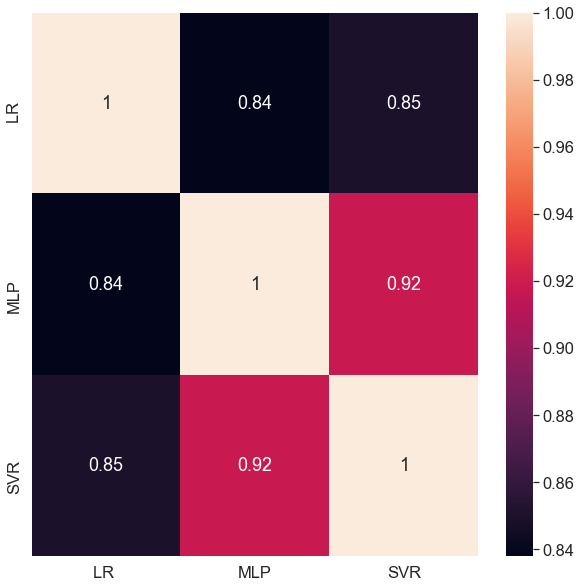

In [31]:
results={"LR ":y_pred_lr,"MLP":y_pred_mlp, "SVR":y_pred_lsvr}
df = pd.DataFrame(results,columns=results.keys())
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.5)
sn.heatmap(corrMatrix, annot=True)
plt.show()